Explicit Euler integration of the Lotka–Volterra model.


a. Write some code implementing the explicit Euler integration scheme described in equations (14.7). Take, for instance, α = 2/3, β = 4/3, γ = 1, δ = 1, x0 = 1, and
y0 = 1. Show that the numerical solution is very similar to figure 14.4(a).

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Explicit Euler integration of the Lotka–Volterra model
deltaT = 0.05
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1
x0 = 1
y0 = 1
tMax = 20
x = []
y = []

for i in range(int(tMax/deltaT)):
    x1 = x0 + deltaT * (alpha * x0 - beta * x0 * y0)
    y1 = y0 + deltaT * (delta * x0 * y0 - gamma * y0)
    x0 = x1
    y0 = y1
    x.append(x0)
    y.append(y0)


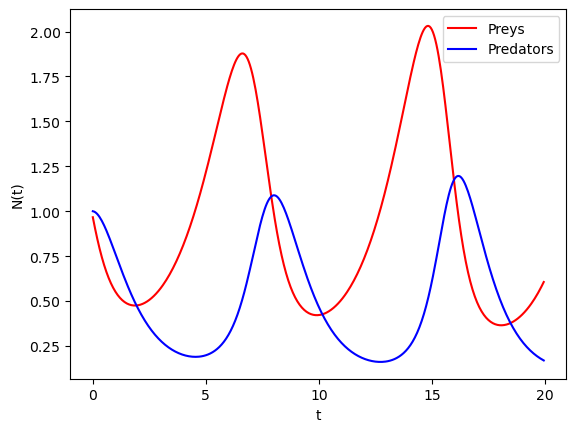

In [7]:
#Plotting
t = np.arange(0, tMax, deltaT)

plt.plot(t,x,'r',label='Preys')
plt.plot(t,y,'b',label='Predators')
plt.xticks(np.arange(0, tMax+1, 5))
plt.ylabel('N(t)')
plt.xlabel('t')
plt.legend()
plt.show()

b) Calculate and plot the value of the invariant, I(x, y) = δx − γ log(x) + βy − α log(y), along a trajectory. Is it constant in time? Compare it with figure 14.4(b).

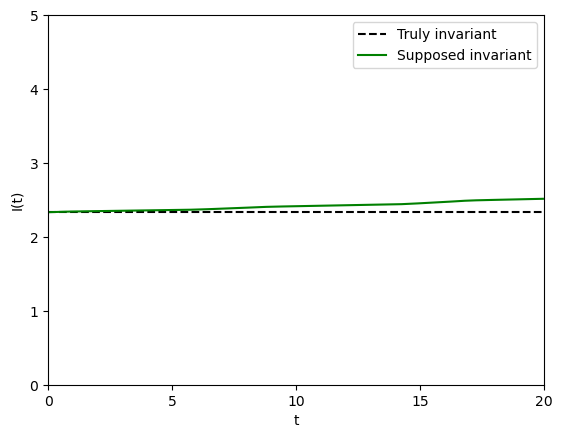

In [8]:
invariant = delta * np.array(x) - gamma * np.log(np.array(x)) + beta * np.array(y) - alpha * np.log(np.array(y))
plt.axhline(y=invariant[0], color='black', linestyle='dashed', label='Truly invariant')

plt.plot(t, invariant, 'g', label='Supposed invariant')
plt.xticks(np.arange(0, tMax+1, 5))
plt.ylabel('I(t)')
plt.ylim(0.0, 5.0)
plt.xlim(0, 20)
plt.xlabel('t')
plt.legend()
plt.show()


c. Plot your solution in phase space. Is it periodic? What happens to this trajectory in the long run? Compare it with figure 14.4(c).

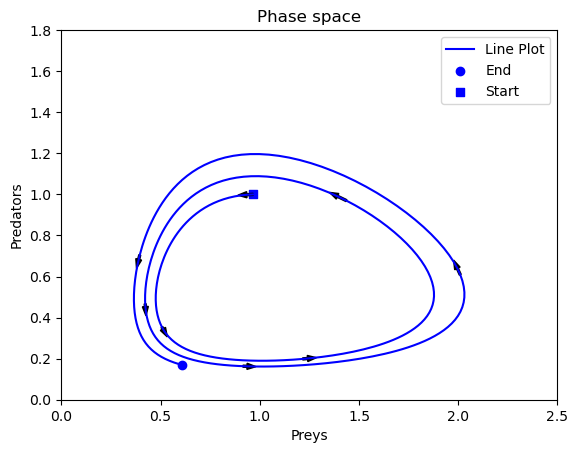

In [12]:
fig, ax = plt.subplots()

ax.plot(x, y, label='Line Plot', color='blue')
ax.scatter(x[-1], y[-1], marker='o', color='blue', label='End')
ax.scatter(x[0], y[0], marker='s', color='blue', label='Start')
ax.set_xlim([0, 2.5])
ax.set_ylim([0, 1.8])
ax.set_xlabel('Preys')
ax.set_ylabel('Predators')
ax.set_title('Phase space')
ax.legend()

# show the direction of the flow with some arrows on the trajectory
for i in range(0, int(tMax/deltaT), 50):
    ax.arrow(x[i], y[i], x[i+1]-x[i], y[i+1]-y[i], width=0.01, color='black')

plt.show()


The numerical solution given by this integration method is not periodic (Plot 1). Furthermore, the invariant I(x, y) calculated along the trajectory is not constant in time, but features an increasing trend (Plot 2), and the trajectory in phase space is not closed (Plot 3). Therefore, the explicit Euler integration scheme has flaws that might undermine the stability of the numerical simulation and the plausibility of its results.
